In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf


from source.processing import load_split_tensors
from source.pix2pix import Generator, Discriminator, fit


from config.settings import PROCESSING, MODEL

2022-05-18 17:12:06.667870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 17:12:06.667910: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-18 17:12:08.574217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 17:12:08.574239: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 17:12:08.574252: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LT35): /proc/driver/nvidia/version does not exist
2022-05-18 17:12:08.574478: I tensorflow/core/platform/cpu_feature_guard

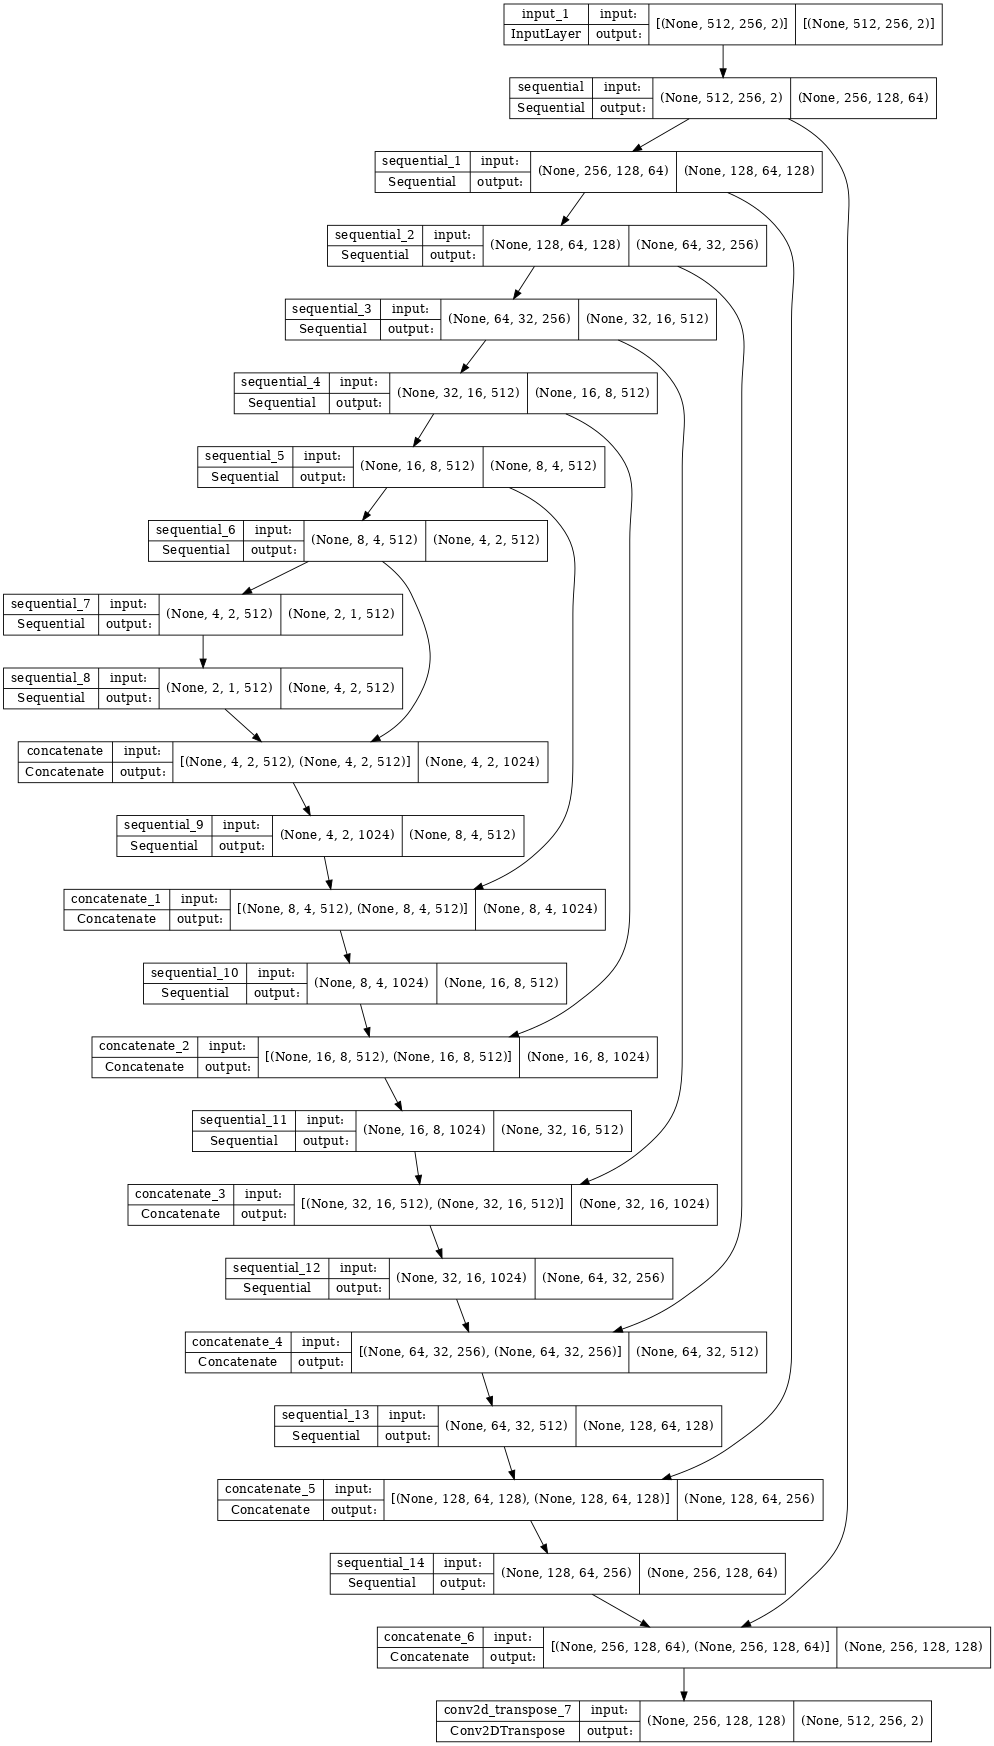

In [2]:
generator = Generator()
keras.utils.plot_model(generator, show_shapes=True, dpi=64)

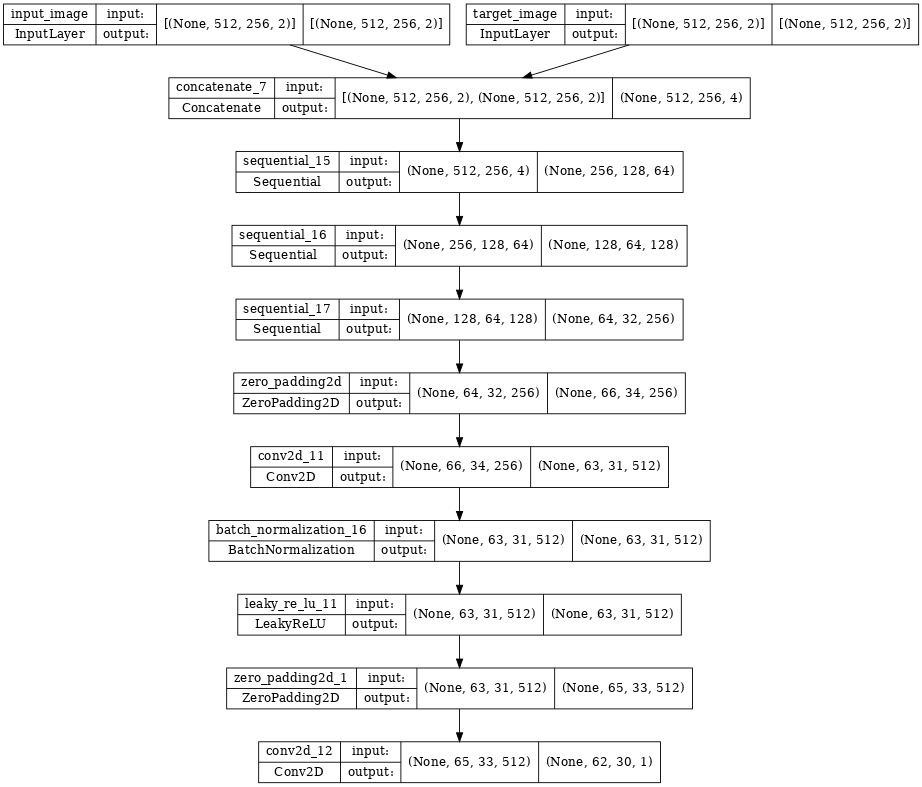

In [3]:
discriminator = Discriminator()
keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [23]:
def preprocess(tensor):
    def scale(arr):
        arr = (arr - 0.5) * 2

        return arr

    result = tensor.astype('float32')
    result = np.apply_along_axis(scale, 0, result)

    return result

In [24]:
x_train, y_train, x_test, y_test, scalars = load_split_tensors(PROCESSING.tensors_folder)

In [25]:
x_train = preprocess(x_train)

In [26]:
x_train.shape

(228, 512, 256, 2)

In [10]:
x_test.shape

(19, 512, 256, 2)

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train.astype('float32'), y_train.astype('float32'))).batch(1)
test_ds = tf.data.Dataset.from_tensor_slices((x_test.astype('float32'), y_test.astype('float32'))).batch(1)

In [6]:
example_input, example_target = next(iter(test_ds.take(1)))

In [7]:
example_input.dtype

tf.float32

In [8]:
fit(generator, discriminator, train_ds, test_ds, steps=100)

Step: 0k
tf.Tensor(0, shape=(), dtype=int64)
gen_total_loss tf.Tensor(35.136395, shape=(), dtype=float32)
gen_gan_loss tf.Tensor(0.9882948, shape=(), dtype=float32)
gen_l1_loss tf.Tensor(0.34148097, shape=(), dtype=float32)
disc_loss tf.Tensor(1.7020901, shape=(), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
gen_total_loss tf.Tensor(32.876854, shape=(), dtype=float32)
gen_gan_loss tf.Tensor(0.7372652, shape=(), dtype=float32)
gen_l1_loss tf.Tensor(0.32139587, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6279669, shape=(), dtype=float32)
tf.Tensor(2, shape=(), dtype=int64)
gen_total_loss tf.Tensor(31.070112, shape=(), dtype=float32)
gen_gan_loss tf.Tensor(0.7903927, shape=(), dtype=float32)
gen_l1_loss tf.Tensor(0.3027972, shape=(), dtype=float32)
disc_loss tf.Tensor(1.5843524, shape=(), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)
gen_total_loss tf.Tensor(29.39878, shape=(), dtype=float32)
gen_gan_loss tf.Tensor(0.9105426, shape=(), dtype=float32)
gen_l1_loss tf.Tensor(0.

KeyboardInterrupt: 

In [13]:
pred = generator.predict(x_test)

In [14]:
print(pred.shape)

(19, 512, 256, 2)
